In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras import utils
import time
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.layers import Embedding, Dense

In [55]:
max_features = 10000  # кількість слів, що розглядаються як особливості
max_len = 500  # обмеження кількості слів в тексті
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

input_train = pad_sequences(input_train, maxlen=max_len)
input_test = pad_sequences(input_test, maxlen=max_len)

Побудова моделі RNN:

In [56]:
from keras.layers import SimpleRNN


model_rnn = Sequential()

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_rnn.add(Embedding(max_features, 32)) # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання SimpleRNN шару з 32 вузлами
model_rnn.add(SimpleRNN(32)) # Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model_rnn.add(Dense(1, activation="sigmoid")) # Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

In [57]:
model_rnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_rnn.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

history_rnn = model_rnn.fit(
    input_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 205s 1s/step - loss: 0.5991 - accuracy: 0.6708 - val_loss: 0.5653 - val_accuracy: 0.7123
Epoch 2/5
137/137 [==============================] - 197s 1s/step - loss: 0.3848 - accuracy: 0.8427 - val_loss: 0.3838 - val_accuracy: 0.8383
Epoch 3/5
137/137 [==============================] - 203s 1s/step - loss: 0.2919 - accuracy: 0.8860 - val_loss: 0.3537 - val_accuracy: 0.8536
Epoch 4/5
137/137 [==============================] - 199s 1s/step - loss: 0.2357 - accuracy: 0.9104 - val_loss: 0.3978 - val_accuracy: 0.8215
Epoch 5/5
137/137 [==============================] - 203s 1s/step - loss: 0.1791 - accuracy: 0.9343 - val_loss: 0.3693 - val_accuracy: 0.8615


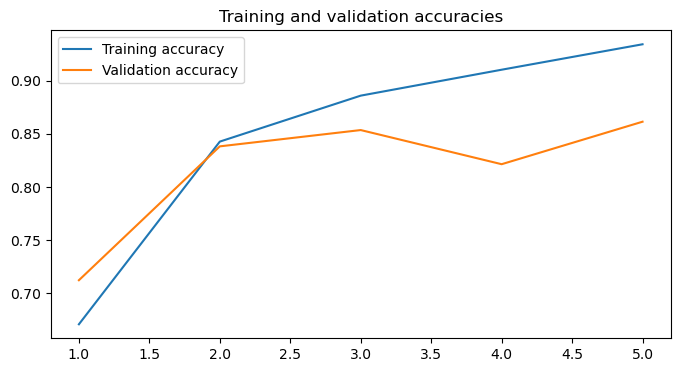

In [60]:
epochs = range(1, len(history_rnn.history["accuracy"]) + 1) 
plt.figure(figsize=(8, 4)) 
plt.plot(epochs, history_rnn.history["accuracy"], label="Training accuracy") 
plt.plot(epochs, history_rnn.history["val_accuracy"], label="Validation accuracy")
plt.title("Training and validation accuracies") 
plt.legend() 
plt.show()

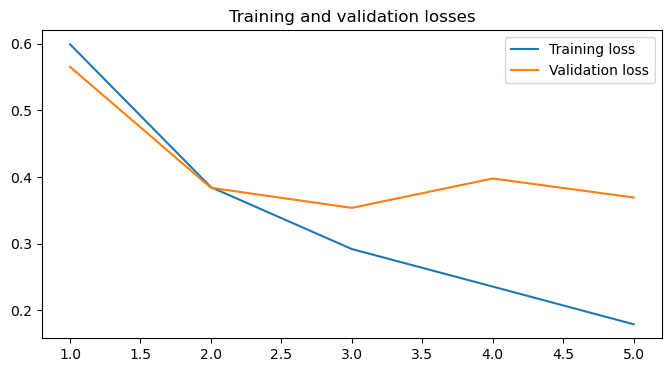

In [61]:
plt.figure(figsize=(8, 4)) 
plt.plot(epochs, history_rnn.history["loss"],  label="Training loss") 
plt.plot(epochs, history_rnn.history["val_loss"], label="Validation loss") 
plt.title("Training and validation losses") 
plt.legend()
plt.show()

Прогнозування з використанням навченої моделі:

In [62]:
predictions = model_rnn.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


782/782 [==============================] - 63s 80ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


In [89]:
# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_rnn.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format((test_acc)*100,2))

# result_test = model.evaluate(x_test, y_test)
# print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))

782/782 [==============================] - 69s 88ms/step - loss: 0.3877 - accuracy: 0.8520
Test Loss: 0.3876892924308777
Test Accuracy: 85.19600033760071


Пбудова моделі LSTM

In [64]:
from keras.layers import LSTM


model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation="sigmoid"))

In [65]:
model_lstm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_lstm.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

In [67]:
history_lstm = model_lstm.fit(
    input_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3)

Epoch 1/5


137/137 [==============================] - 14s 89ms/step - loss: 0.5090 - accuracy: 0.7639 - val_loss: 0.3506 - val_accuracy: 0.8647
Epoch 2/5
137/137 [==============================] - 12s 87ms/step - loss: 0.2954 - accuracy: 0.8852 - val_loss: 0.4438 - val_accuracy: 0.8071
Epoch 3/5
137/137 [==============================] - 12s 86ms/step - loss: 0.2308 - accuracy: 0.9147 - val_loss: 0.3290 - val_accuracy: 0.8849
Epoch 4/5
137/137 [==============================] - 12s 86ms/step - loss: 0.2027 - accuracy: 0.9250 - val_loss: 0.3347 - val_accuracy: 0.8708
Epoch 5/5
137/137 [==============================] - 12s 87ms/step - loss: 0.1753 - accuracy: 0.9373 - val_loss: 0.2919 - val_accuracy: 0.8807


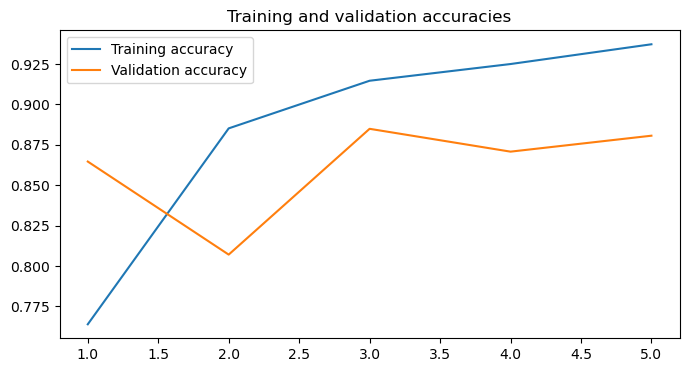

In [68]:
epochs = range(1, len(history_lstm.history["accuracy"]) + 1) 
plt.figure(figsize=(8, 4)) 
plt.plot(epochs, history_lstm.history["accuracy"], label="Training accuracy") 
plt.plot(epochs, history_lstm.history["val_accuracy"], label="Validation accuracy")
plt.title("Training and validation accuracies") 
plt.legend() 
plt.show()

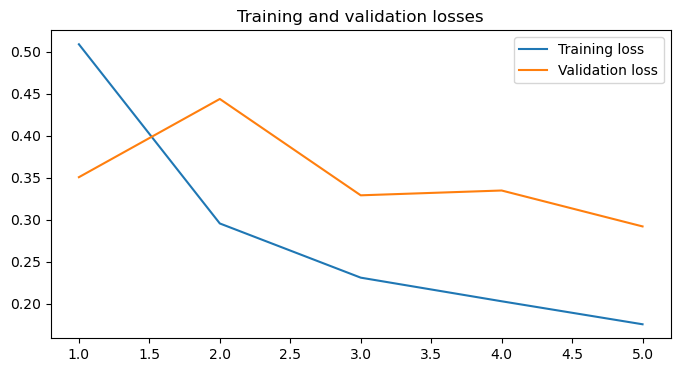

In [69]:
plt.figure(figsize=(8, 4)) 
plt.plot(epochs, history_lstm.history["loss"],  label="Training loss") 
plt.plot(epochs, history_lstm.history["val_loss"], label="Validation loss") 
plt.title("Training and validation losses") 
plt.legend()
plt.show()

In [70]:
predictions = model_lstm.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


782/782 [==============================] - 13s 16ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


In [88]:
# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_lstm.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('LSTM model Test Accuracy % : {}'.format((test_acc)*100,2))

782/782 [==============================] - 16s 20ms/step - loss: 0.3136 - accuracy: 0.8731
Test Loss: 0.3136328458786011
LSTM model Test Accuracy % : 87.30800151824951


Побудова моделі Двосторонньої мережі (BRNN):

In [72]:
from keras.layers import Bidirectional


model_bidirectional = Sequential()
model_bidirectional.add(Embedding(max_features, 32))
model_bidirectional.add(Bidirectional(LSTM(32)))
model_bidirectional.add(Dense(1, activation="sigmoid"))

In [73]:
model_bidirectional.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 32)          320000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_bidirectional.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

history_bidirectional = model_bidirectional.fit(
    input_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3)

Epoch 1/5


137/137 [==============================] - 28s 182ms/step - loss: 0.5246 - accuracy: 0.7515 - val_loss: 0.3565 - val_accuracy: 0.8619
Epoch 2/5
137/137 [==============================] - 24s 178ms/step - loss: 0.3153 - accuracy: 0.8773 - val_loss: 0.2984 - val_accuracy: 0.8851
Epoch 3/5
137/137 [==============================] - 24s 176ms/step - loss: 0.2432 - accuracy: 0.9075 - val_loss: 0.2918 - val_accuracy: 0.8852
Epoch 4/5
137/137 [==============================] - 24s 177ms/step - loss: 0.2049 - accuracy: 0.9264 - val_loss: 0.2928 - val_accuracy: 0.8772
Epoch 5/5
137/137 [==============================] - 24s 177ms/step - loss: 0.1781 - accuracy: 0.9370 - val_loss: 0.3111 - val_accuracy: 0.8840


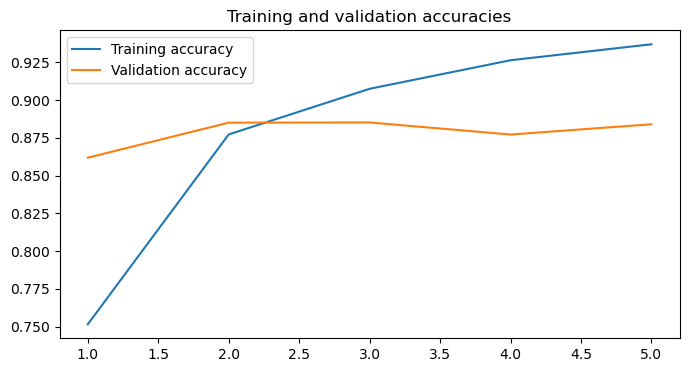

In [75]:
epochs = range(1, len(history_bidirectional.history["accuracy"]) + 1) 
plt.figure(figsize=(8, 4)) 
plt.plot(epochs, history_bidirectional.history["accuracy"], label="Training accuracy") 
plt.plot(epochs, history_bidirectional.history["val_accuracy"], label="Validation accuracy")
plt.title("Training and validation accuracies") 
plt.legend() 
plt.show()

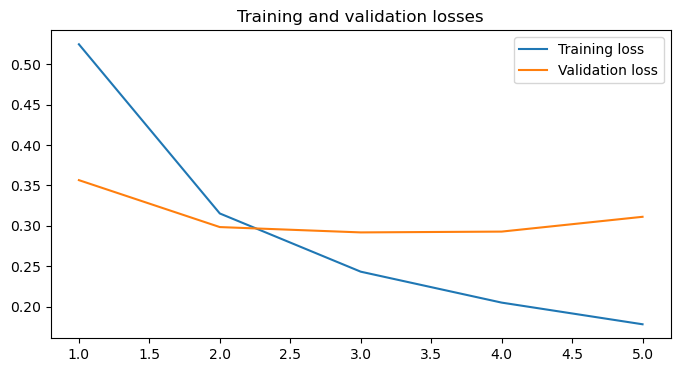

In [76]:
plt.figure(figsize=(8, 4)) 
plt.plot(epochs, history_bidirectional.history["loss"],  label="Training loss") 
plt.plot(epochs, history_bidirectional.history["val_loss"], label="Validation loss") 
plt.title("Training and validation losses") 
plt.legend()
plt.show()

In [77]:
predictions = model_bidirectional.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

782/782 [==============================] - 25s 31ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


In [90]:
# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_bidirectional.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('model BRNN Test Accuracy: {}'.format((test_acc)*100,2))

782/782 [==============================] - 27s 34ms/step - loss: 0.3376 - accuracy: 0.8743
Test Loss: 0.3375883102416992
model BRNN Test Accuracy: 87.43199706077576


Побудова моделі Глибокої мережі (DRNN):

In [79]:
model_deep = Sequential()
model_deep.add(Embedding(max_len, 32))
model_deep.add(LSTM(64, return_sequences=True))
model_deep.add(LSTM(32))
model_deep.add(Dense(1, activation="sigmoid"))

In [80]:
model_deep.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 32)          16000     
                                                                 
 lstm_6 (LSTM)               (None, None, 64)          24832     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 53,281
Trainable params: 53,281
Non-trainable params: 0
_________________________________________________________________


In [81]:
model_deep.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])

history_deep = model_deep.fit(
    input_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.3)

Epoch 1/5


137/137 [==============================] - 39s 263ms/step - loss: 0.5674 - accuracy: 0.7015 - val_loss: 0.5449 - val_accuracy: 0.7247
Epoch 2/5
137/137 [==============================] - 35s 257ms/step - loss: 0.4544 - accuracy: 0.7944 - val_loss: 0.4297 - val_accuracy: 0.8111
Epoch 3/5
137/137 [==============================] - 35s 256ms/step - loss: 0.4201 - accuracy: 0.8131 - val_loss: 0.4017 - val_accuracy: 0.8251
Epoch 4/5
137/137 [==============================] - 35s 257ms/step - loss: 0.4049 - accuracy: 0.8215 - val_loss: 0.4231 - val_accuracy: 0.8168
Epoch 5/5
137/137 [==============================] - 35s 256ms/step - loss: 0.3957 - accuracy: 0.8265 - val_loss: 0.3862 - val_accuracy: 0.8321


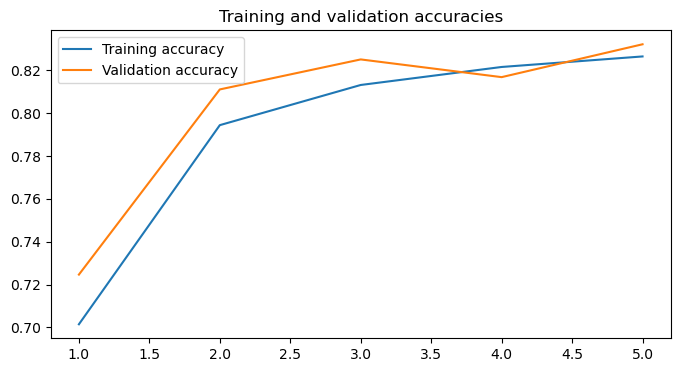

In [82]:
epochs = range(1, len(history_deep.history["accuracy"]) + 1) 
plt.figure(figsize=(8, 4)) 
plt.plot(epochs, history_deep.history["accuracy"], label="Training accuracy") 
plt.plot(epochs, history_deep.history["val_accuracy"], label="Validation accuracy")
plt.title("Training and validation accuracies") 
plt.legend() 
plt.show()

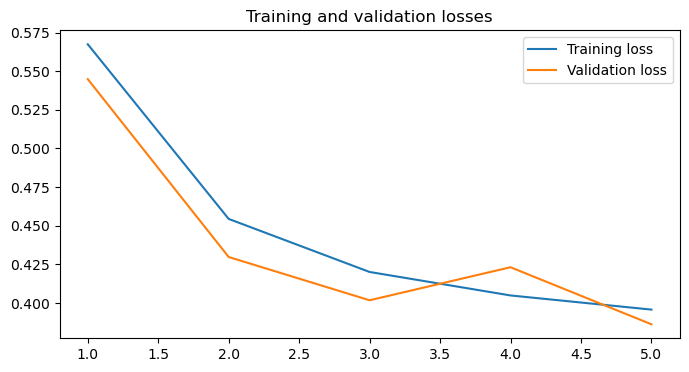

In [83]:
plt.figure(figsize=(8, 4)) 
plt.plot(epochs, history_deep.history["loss"],  label="Training loss") 
plt.plot(epochs, history_deep.history["val_loss"], label="Validation loss") 
plt.title("Training and validation losses") 
plt.legend()
plt.show()

In [84]:
predictions = model_deep.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

782/782 [==============================] - 30s 38ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1


In [91]:
# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_deep.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('model DRNN Test Accuracy: {}'.format((test_acc)*100,2))

782/782 [==============================] - 32s 41ms/step - loss: 0.3840 - accuracy: 0.8294
Test Loss: 0.38401514291763306
model DRNN Test Accuracy: 82.94000029563904


Висновки :

Моделі LSTM, BRNN, DRNN показують кращі результати за просту RNN.

В BRNN моделі якщо збільшити кількість епох то Accuracy трейн и тест починають розходитися .

В LSTM моделі якщо збільшувати кількість епох то показники Accuracy трейн и Accuracy тест будуть на однаковій відстані.

В моєму випадку RNN модель навчалась довше за інші при однаковой кількості вузлів в шарі SimpleRNN з LSTM та Bidirectional(LSTM(32)).

BRNN і DRNN виконуються довше за LSTM модель.

Всі моделі видають хороші показники, та близькі між собою.